Simulating: 100%|██████████| 40/40 [00:19<00:00,  2.06it/s]


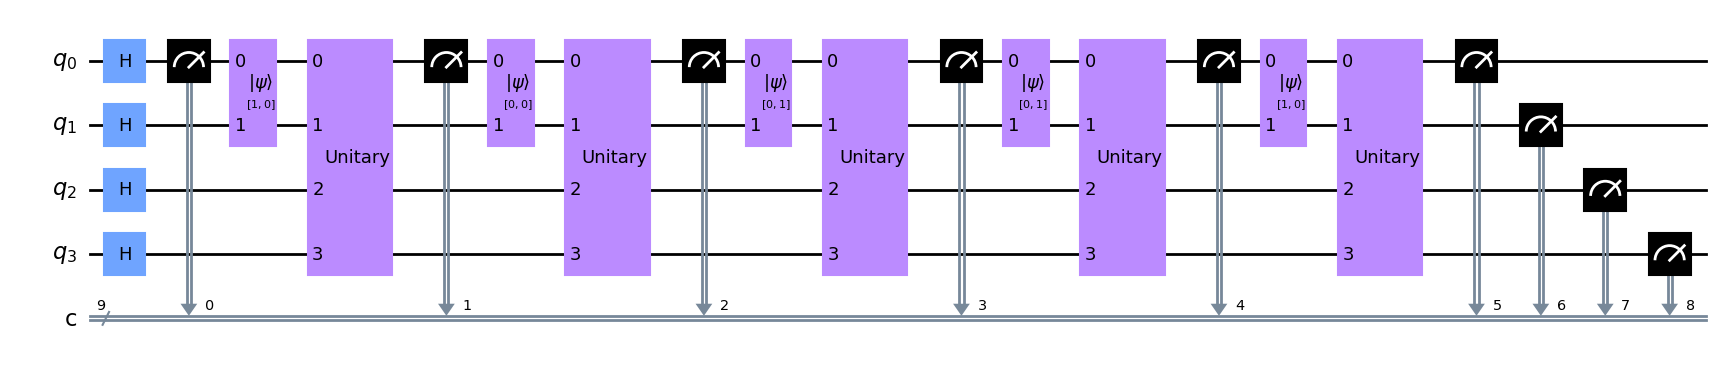

In [1]:
import matplotlib.pyplot as plt
from qiskit.quantum_info import random_unitary
from qreservoirpy import QReservoir, Layers, utilities


def build_method(circ, timestep, operator, encoder):
    circ.measure(circ.qubits[0])
    circ.initialize(encoder[timestep], [0, 1])
    circ.unitary(operator, circ.qubits)
    return circ

res = QReservoir(qubits=4, layers=[
    Layers.H(),
    Layers.Timeseries(build_method=build_method),
    Layers.Measurement([0, 1, 2, 3])
], operator=random_unitary(2**4), encoder = {
    0: '00',
    1: '01',
    2: '10',
    3: '11'
}, analyze_function=lambda res: res[-5:], M=5)

timeseries = [0, 1, 1, 2] * 10
states = res.run(timeseries, shots=10000, incrementally=True)

res.circuit.draw('mpl')



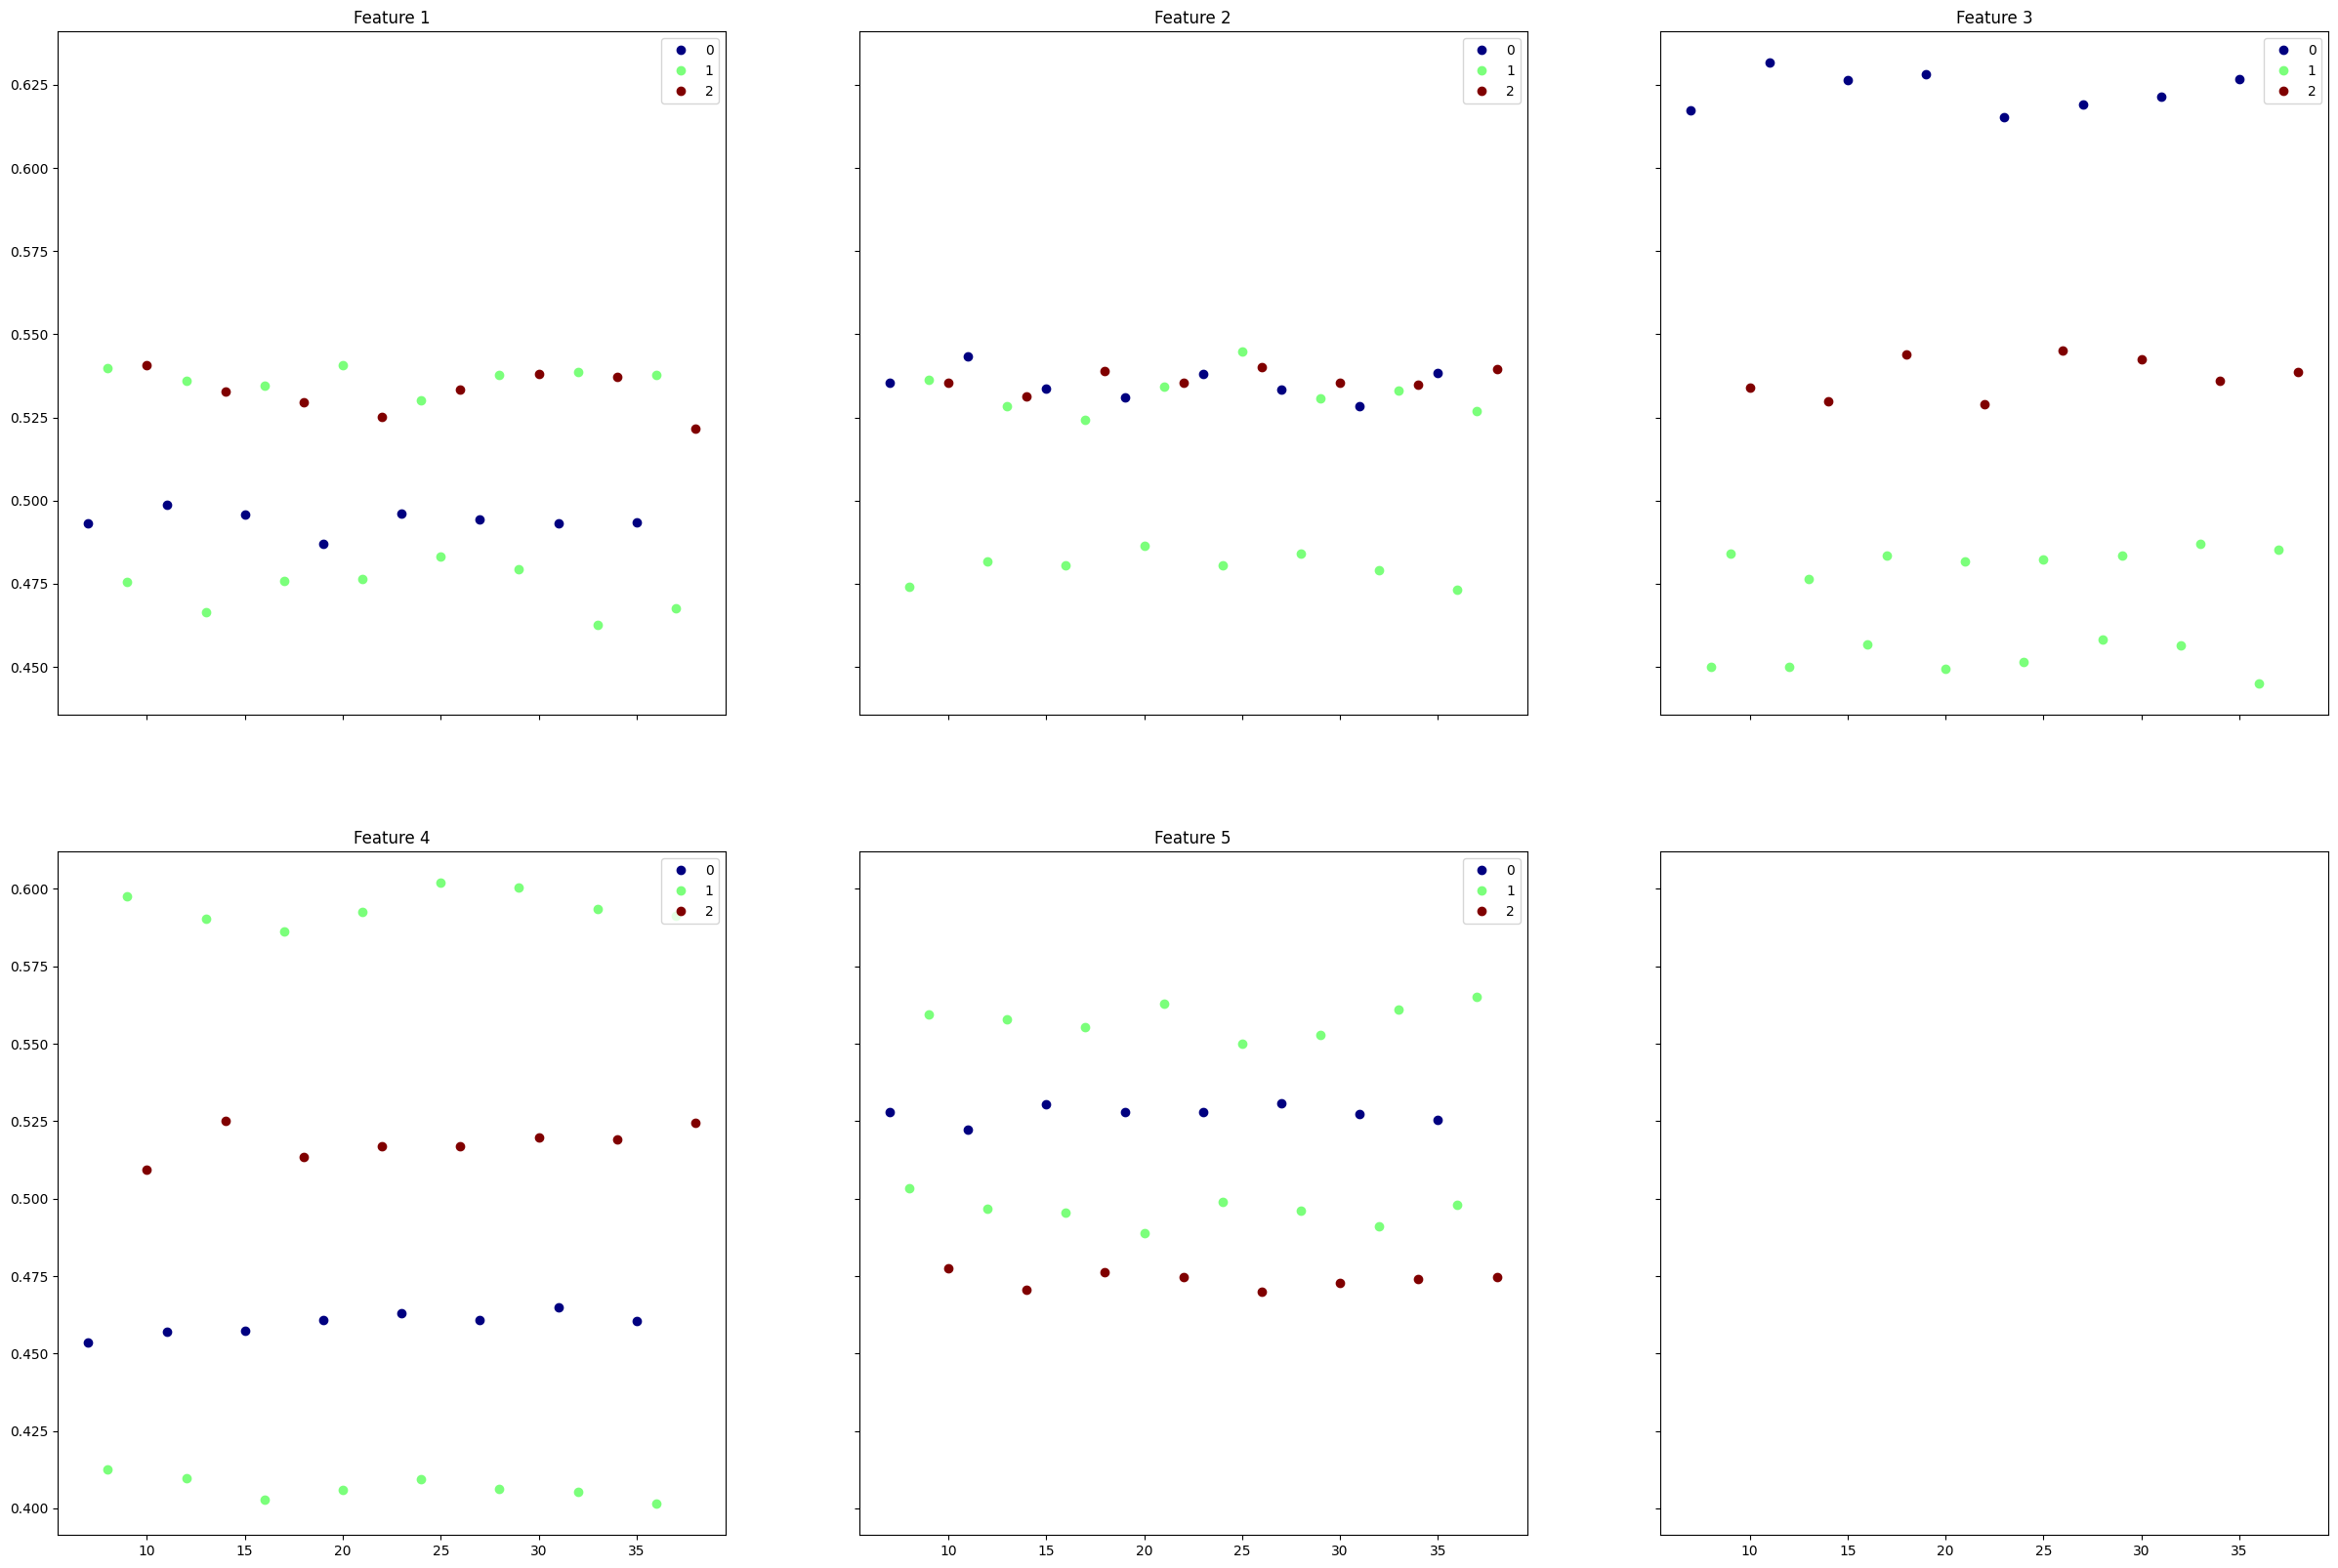

In [2]:
fig, axes = utilities.result_plotter(states[:-1], timeseries[1:], warmup=0.2)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
num_pred = 20
WARMUP = 0.1

warmup = int(len(states) * WARMUP)

x = states[:-1][warmup:]
target = timeseries[1:][warmup:]

model = KNeighborsClassifier(n_neighbors=2)
model.fit(x, target)

pred_states, preds = res.predict(num_pred, model, from_series=target)

Predicting: 100%|██████████| 20/20 [00:09<00:00,  2.00it/s]


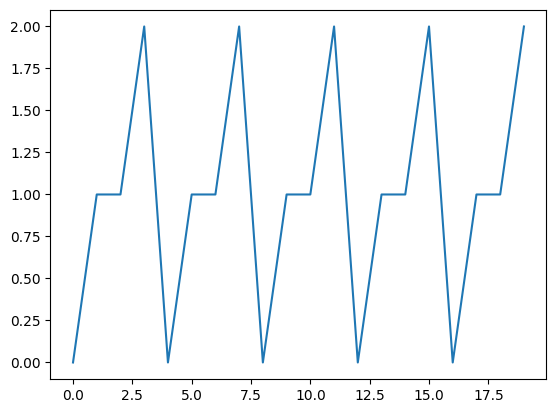

In [9]:
plt.plot(preds)